# Global Entities - per Entity Group - Visualizer 

#### Version 1.0

### TODO

- ~~Line plot for world~~
- Line plot of aggregated countries and compare to world
- ~~Line plot per country/region/income/etc~~
- ~~Heatmap for corellation between metrics per entity~~
- Correlation between metrics across entities

### Observations

## Setup

### Import Packages

In [11]:
from datetime import datetime, date
from pprint import pprint
from collections import OrderedDict
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# Set ipython's max row display
# pd.set_option('display.max_row', 1000)
# Set iPython's max column width
pd.set_option('display.max_columns', 50)

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 10]

### Functions

In [12]:
def masked_heatmap():
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig,ax = plt.subplots()
    sns.heatmap(corr,center = 0, fmt = ".3f", square = True, annot= True, mask=mask)

## Global Variables

#### Dataset Parameters

In [20]:
file_name = '../data/forecasts_tables/all_entities_forecasts.csv'

year_range = [1960, 2022]

In [21]:
country_list = ['United Arab Emirates', 'Japan', 'Ghana'] #For country level analysis

In [22]:
key_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)', 'Fossil fuels (% equivalent primary energy)',
    'Renewables per capita (kWh - equivalent)', 'Renewables (% electricity)',
    'Solar Generation - TWh', 'prod of Electricity from solar (TWh)',
]

corr_columns = [
    'Annual CO2 emissions', 'Annual change in primary energy consumption (%)',
    'Per capita electricity (kWh)',
    'Fossil fuels per capita (kWh)',
    'Renewables per capita (kWh - equivalent)',
]

## Data Prep

In [23]:
df_original = pd.read_csv(file_name)

In [24]:
df_original = df_original.loc[
    (df_original['Year'] > year_range[0])
    # & (df_original['Year'] < year_range[1])
]

In [25]:
df_original['Year'].max()

2050

In [26]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19458 entries, 0 to 19457
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            19458 non-null  int64  
 1   Annual CO2 emissions            12651 non-null  float64
 2   trend                           19458 non-null  float64
 3   yhat_lower                      19458 non-null  float64
 4   yhat_upper                      19458 non-null  float64
 5   trend_lower                     19458 non-null  float64
 6   trend_upper                     19458 non-null  float64
 7   additive_terms                  19458 non-null  float64
 8   additive_terms_lower            19458 non-null  float64
 9   additive_terms_upper            19458 non-null  float64
 10  yearly                          19458 non-null  float64
 11  yearly_lower                    19458 non-null  float64
 12  yearly_upper                    

In [27]:
df_original.head()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted,Entity,Entity_Category
0,1961,645553.0,348572.950385,-392061.276763,1.326828e+06,348572.950385,348572.950385,115998.488548,115998.488548,115998.488548,115998.488548,115998.488548,115998.488548,0.0,0.0,0.0,464571.438933,Aruba,Country
1,1962,708942.0,370307.263601,-374778.972297,1.302761e+06,370307.263601,370307.263601,99152.215880,99152.215880,99152.215880,99152.215880,99152.215880,99152.215880,0.0,0.0,0.0,469459.479482,Aruba,Country
2,1963,679088.0,392041.576818,-392316.399390,1.359247e+06,392041.576818,392041.576818,89219.703262,89219.703262,89219.703262,89219.703262,89219.703262,89219.703262,0.0,0.0,0.0,481261.280081,Aruba,Country
3,1964,660275.0,413775.890031,-382731.039051,1.356004e+06,413775.890031,413775.890031,86213.095529,86213.095529,86213.095529,86213.095529,86213.095529,86213.095529,0.0,0.0,0.0,499988.985560,Aruba,Country
4,1965,592387.0,435569.749307,-292298.458799,1.385045e+06,435569.749307,435569.749307,115998.488548,115998.488548,115998.488548,115998.488548,115998.488548,115998.488548,0.0,0.0,0.0,551568.237855,Aruba,Country


In [28]:
df_original.describe()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted
count,19458.000000,1.265100e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,1.945800e+04,19458.0,19458.0,19458.0,1.945800e+04
mean,2006.314986,2.164809e+08,1.819459e+08,2.672695e+08,3.067053e+08,1.780896e+08,1.859452e+08,1.049562e+08,1.049562e+08,1.049562e+08,1.049562e+08,1.049562e+08,1.049562e+08,0.0,0.0,0.0,2.869022e+08
std,25.494838,1.755023e+09,1.790534e+09,2.366319e+09,2.549172e+09,1.755952e+09,1.828849e+09,8.210185e+08,8.210185e+08,8.210185e+08,8.210185e+08,8.210185e+08,8.210185e+08,0.0,0.0,0.0,2.456162e+09
min,1961.000000,3.664000e+03,-2.094858e+09,-4.890177e+08,-3.038774e+07,-2.094858e+09,-2.094858e+09,-1.477014e+08,-1.477014e+08,-1.477014e+08,-1.477014e+08,-1.477014e+08,-1.477014e+08,0.0,0.0,0.0,-5.770486e+07
25%,1985.000000,6.012190e+05,3.695524e+04,3.806271e+05,1.156453e+06,3.495828e+04,3.844139e+04,2.243572e+04,2.243572e+04,2.243572e+04,2.243572e+04,2.243572e+04,2.243572e+04,0.0,0.0,0.0,7.729433e+05
50%,2007.000000,5.064147e+06,1.519710e+06,4.351826e+06,9.116511e+06,1.495675e+06,1.532415e+06,1.288539e+06,1.288539e+06,1.288539e+06,1.288539e+06,1.288539e+06,1.288539e+06,0.0,0.0,0.0,7.016758e+06
75%,2028.000000,4.262826e+07,2.082390e+07,3.900238e+07,5.677207e+07,2.057203e+07,2.113827e+07,1.273849e+07,1.273849e+07,1.273849e+07,1.273849e+07,1.273849e+07,1.273849e+07,0.0,0.0,0.0,4.794770e+07
max,2050.000000,3.670250e+10,4.434370e+10,5.329999e+10,5.768846e+10,4.258631e+10,4.628948e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,0.0,0.0,0.0,5.534597e+10


## Visualizations

### World

In [29]:
category_filter = "World"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [30]:
df.head()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted,Entity,Entity_Category
13404,1961,9.417463e+09,-2.094858e+09,8.498648e+09,1.071353e+10,-2.094858e+09,-2.094858e+09,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,0.0,0.0,0.0,9.572680e+09,World,World
13405,1962,9.750057e+09,-1.549632e+09,9.123950e+09,1.129075e+10,-1.549632e+09,-1.549632e+09,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,0.0,0.0,0.0,1.014811e+10,World,World
13406,1963,1.027152e+10,-1.004406e+09,9.550081e+09,1.176422e+10,-1.004406e+09,-1.004406e+09,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,0.0,0.0,0.0,1.066704e+10,World,World
13407,1964,1.082886e+10,-4.591799e+08,1.006380e+10,1.219153e+10,-4.591799e+08,-4.591799e+08,1.158862e+10,1.158862e+10,1.158862e+10,1.158862e+10,1.158862e+10,1.158862e+10,0.0,0.0,0.0,1.112944e+10,World,World
13408,1965,1.131723e+10,8.753973e+07,1.064679e+10,1.290987e+10,8.753973e+07,8.753973e+07,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,0.0,0.0,0.0,1.175508e+10,World,World


In [31]:
df.describe()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted
count,91.000000,6.000000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.0,91.0,91.0,9.100000e+01
mean,2005.670330,2.316182e+10,1.971816e+10,2.999689e+10,3.241283e+10,1.947135e+10,1.999153e+10,1.147371e+10,1.147371e+10,1.147371e+10,1.147371e+10,1.147371e+10,1.147371e+10,0.0,0.0,0.0,3.119187e+10
std,26.029921,7.980183e+09,1.350446e+10,1.312517e+10,1.347497e+10,1.314291e+10,1.391384e+10,3.082411e+08,3.082411e+08,3.082411e+08,3.082411e+08,3.082411e+08,3.082411e+08,0.0,0.0,0.0,1.328478e+10
min,1961.000000,9.417463e+09,-2.094858e+09,8.498648e+09,1.071353e+10,-2.094858e+09,-2.094858e+09,1.069511e+10,1.069511e+10,1.069511e+10,1.069511e+10,1.069511e+10,1.069511e+10,0.0,0.0,0.0,9.572680e+09
25%,1983.500000,1.775768e+10,8.343986e+09,1.890618e+10,2.110513e+10,8.343986e+09,8.343986e+09,1.135158e+10,1.135158e+10,1.135158e+10,1.135158e+10,1.135158e+10,1.135158e+10,0.0,0.0,0.0,1.997402e+10
50%,2006.000000,2.265960e+10,1.815609e+10,2.878583e+10,3.099818e+10,1.815609e+10,1.815609e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,1.166754e+10,0.0,0.0,0.0,2.985383e+10
75%,2027.500000,2.984797e+10,3.124940e+10,4.119754e+10,4.343372e+10,3.100309e+10,3.150686e+10,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,1.167144e+10,0.0,0.0,0.0,4.232163e+10
max,2050.000000,3.670250e+10,4.434370e+10,5.329999e+10,5.768846e+10,4.258631e+10,4.628948e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,1.169775e+10,0.0,0.0,0.0,5.534597e+10


In [32]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

#### Lineplots - Yearly

Text(0.5, 1.0, 'Year x Annual CO2 emissions per World')

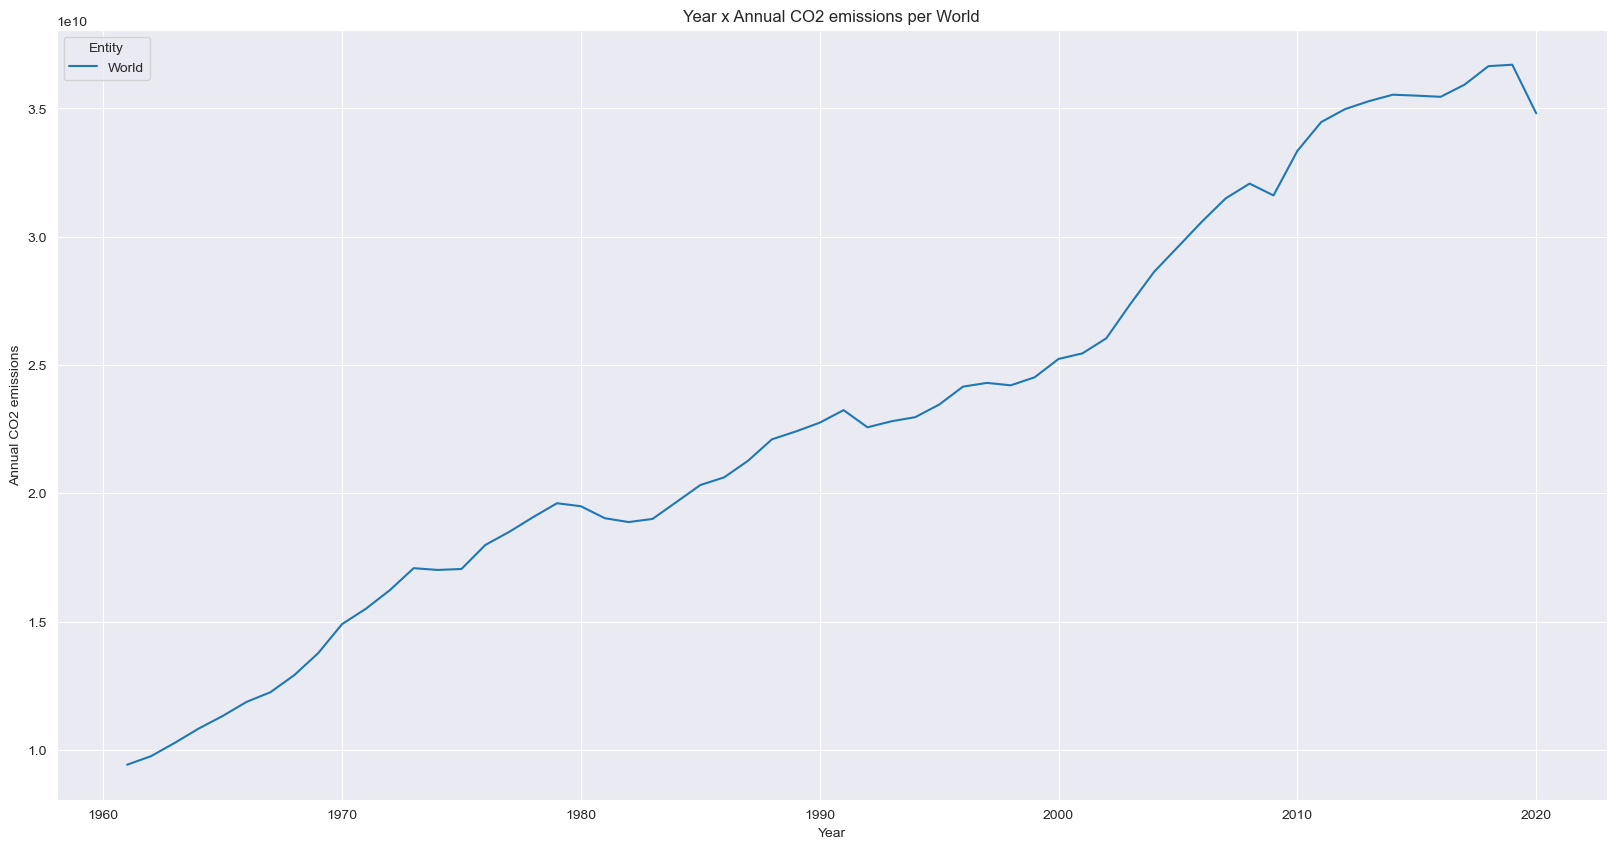

In [33]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual CO2 emissions_predicted'] per World")

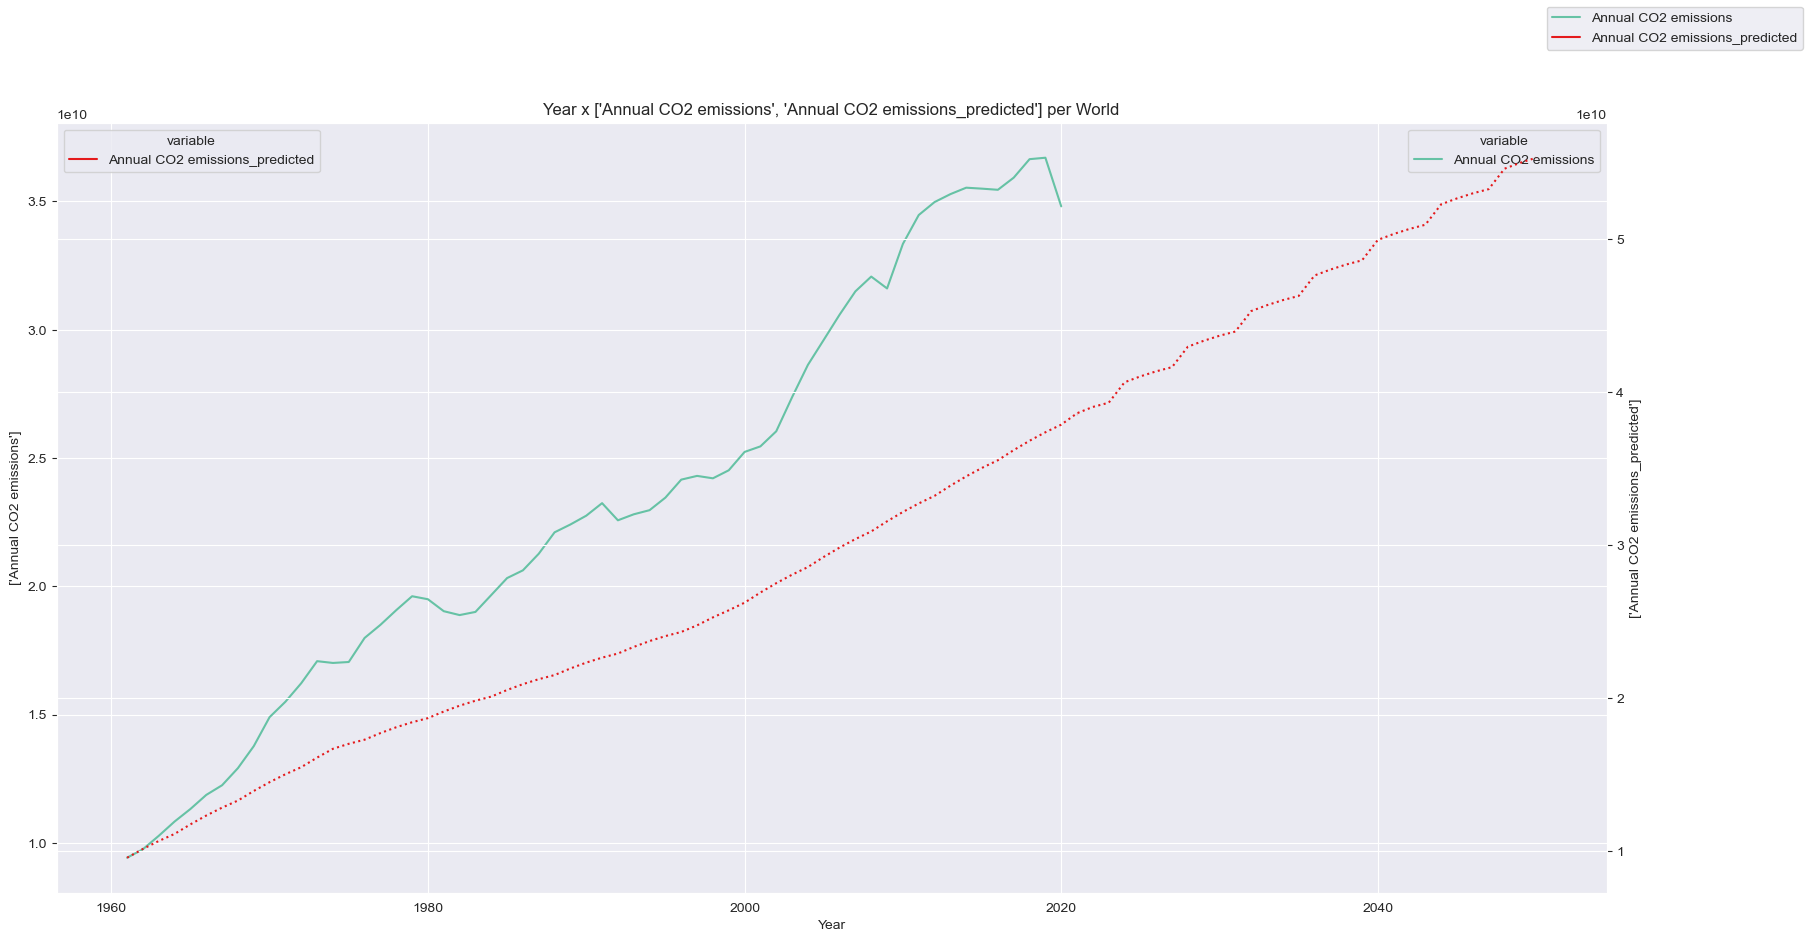

In [34]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual CO2 emissions_predicted']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Annual change in primary energy consumption (%)']"

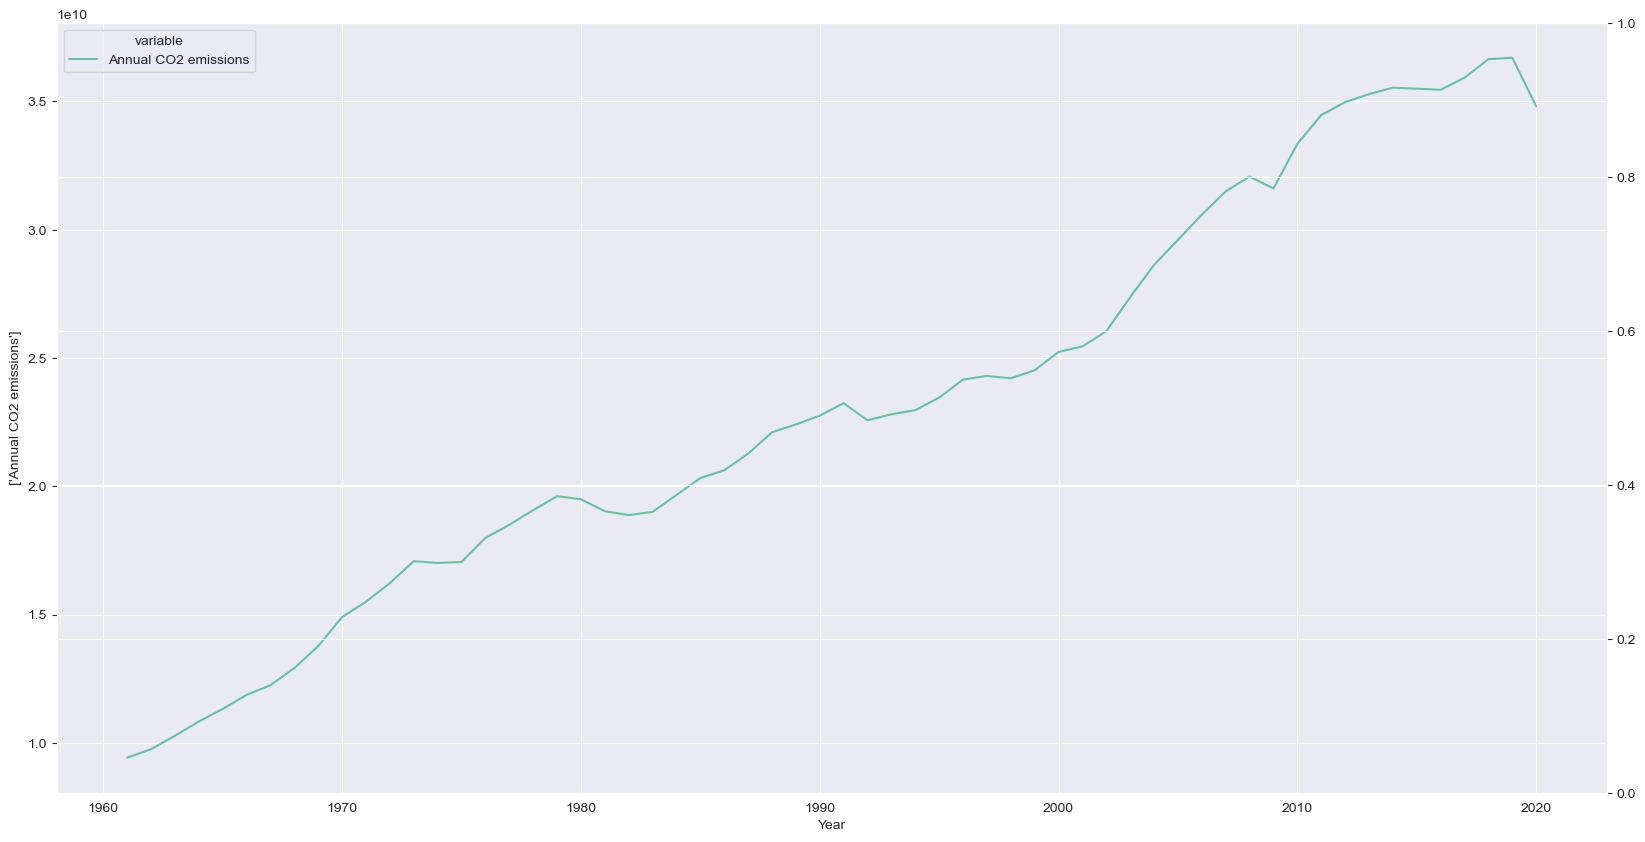

In [35]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

In [36]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Fossil fuels per capita (kWh)']"

In [37]:
y1 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']
y2 = ['Fossil fuels per capita (kWh)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue='variable', palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue='variable', palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']"

#### Correlation Heatmap - For Entity Across Metrics

In [38]:
corr = df[corr_columns].corr()

KeyError: "['Annual change in primary energy consumption (%)', 'Per capita electricity (kWh)', 'Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] not in index"

In [ ]:
masked_heatmap()
plt.title(f"Correlation of Key Metrics across Years in Entity [{category_filter}]")

### Income Level

In [39]:
df_original['Entity_Category'].value_counts()

Country      19298
World           91
Continent       69
Name: Entity_Category, dtype: int64

In [40]:
category_filter = "Income Level"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [41]:
df.head()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted,Entity,Entity_Category


In [42]:
df.describe()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lineplots - Yearly

In [43]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Income Level')

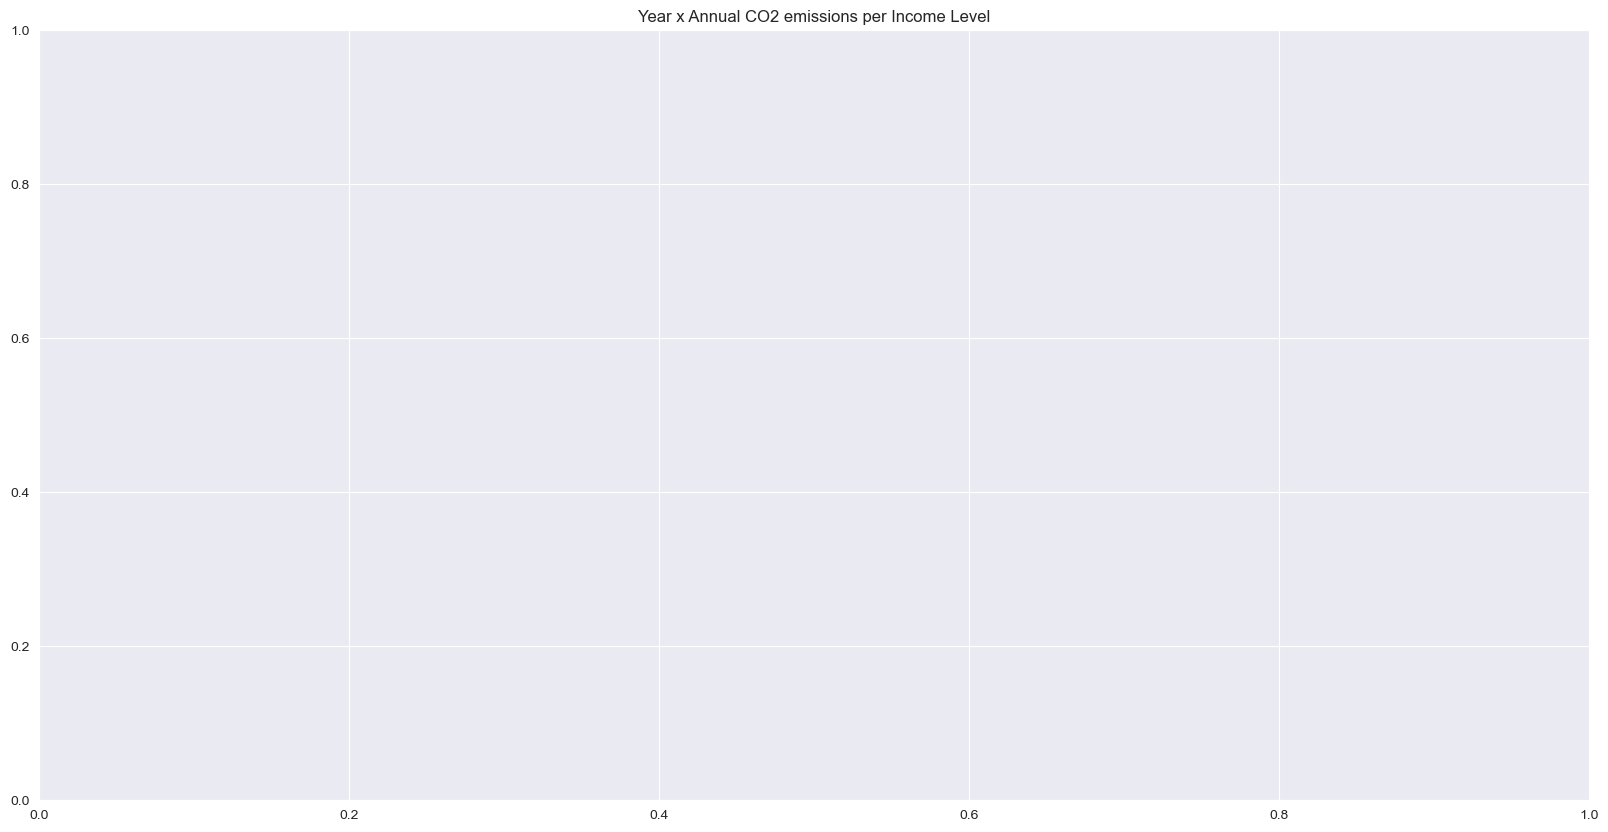

In [44]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

C:\Users\abdul\AppData\Local\Temp\ipykernel_18424\3052271399.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, palette="Set2", legend='auto')


KeyError: "The following 'value_vars' are not present in the DataFrame: ['Annual change in primary energy consumption (%)']"

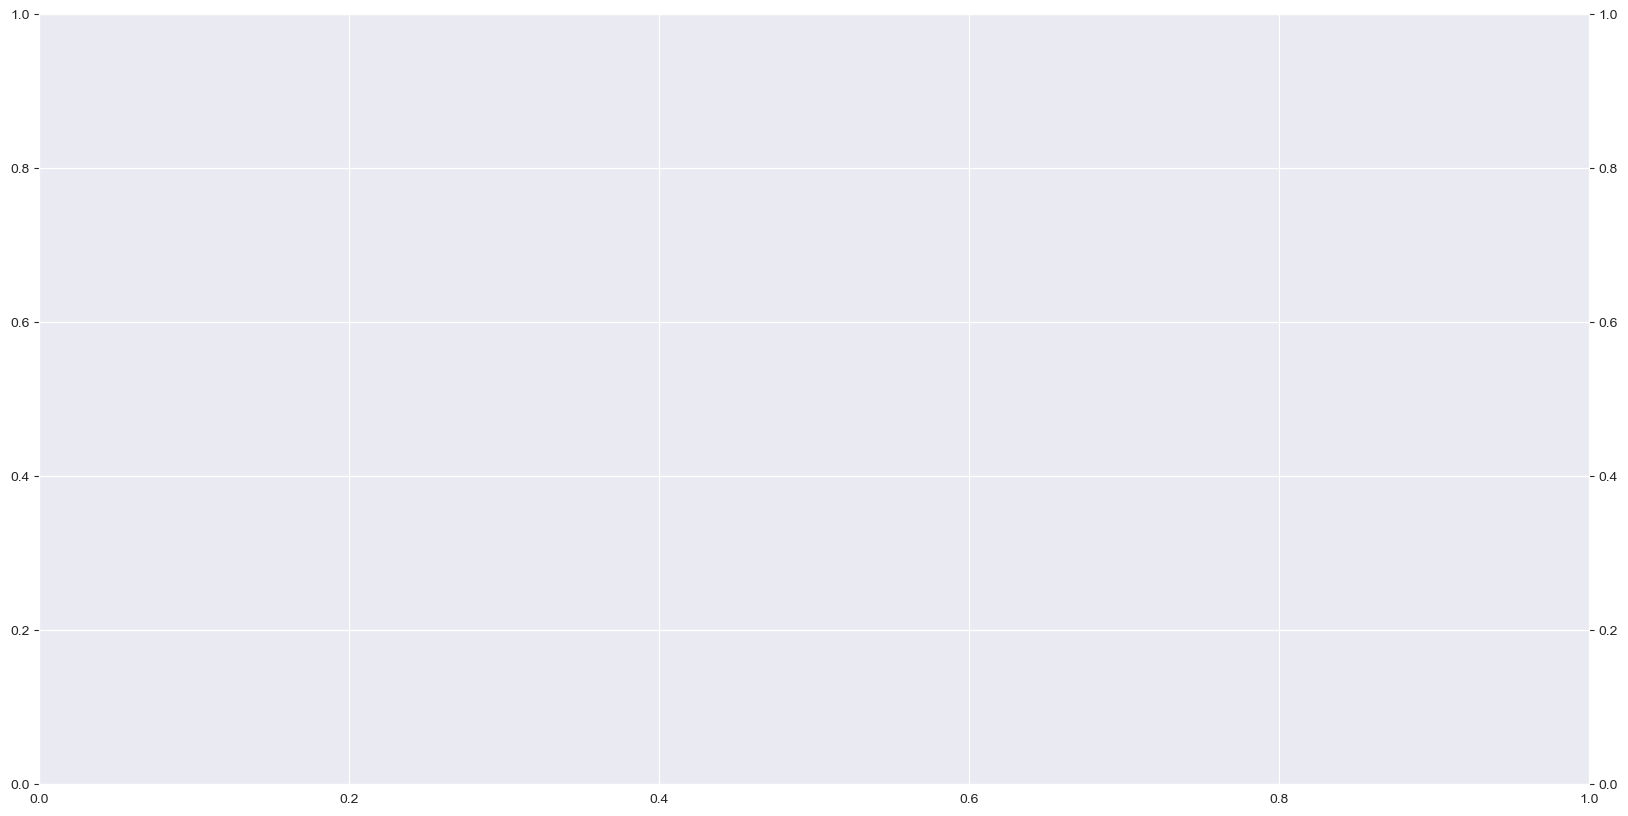

In [45]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, palette="Set2", legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, palette="Set1", linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

In [46]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Fossil fuels per capita (kWh)']"

In [47]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Fossil fuels per capita (kWh)']"

#### Correlation Heatmap - For Entity Across Metrics

In [48]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

In [49]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

KeyError: "['Annual change in primary energy consumption (%)', 'Per capita electricity (kWh)', 'Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] not in index"

### Continent

In [50]:
category_filter = "Continent"

df = df_original.copy().loc[df_original['Entity_Category'] == category_filter]

In [51]:
df.head()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted,Entity,Entity_Category
756,1981,NaN,1187.392024,5970.605565,15670.085900,1187.392024,1187.392024,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,0.0,0.0,0.0,10824.130888,Antarctica,Continent
757,1982,NaN,989.860855,5159.540963,15996.766515,989.860855,989.860855,9425.239960,9425.239960,9425.239960,9425.239960,9425.239960,9425.239960,0.0,0.0,0.0,10415.100815,Antarctica,Continent
758,1983,NaN,792.329687,5041.013213,15642.107760,792.329687,792.329687,9202.286381,9202.286381,9202.286381,9202.286381,9202.286381,9202.286381,0.0,0.0,0.0,9994.616068,Antarctica,Continent
759,1984,NaN,594.798518,4269.502037,14430.712500,594.798518,594.798518,8968.152494,8968.152494,8968.152494,8968.152494,8968.152494,8968.152494,0.0,0.0,0.0,9562.951012,Antarctica,Continent
760,1985,NaN,396.726169,5077.058238,14750.594516,396.726169,396.726169,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,0.0,0.0,0.0,10033.465033,Antarctica,Continent


In [52]:
df.describe()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted
count,69.000000,21.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.0,69.0,69.000000
mean,2014.565217,7328.000000,-5532.832857,-1773.556463,8509.211105,-5532.833620,-5532.832188,8887.422141,8887.422141,8887.422141,8887.422141,8887.422141,8887.422141,0.0,0.0,0.0,3354.589284
std,19.635261,4335.303265,3965.429115,4428.496419,4393.618793,3965.429976,3965.428366,564.856346,564.856346,564.856346,564.856346,564.856346,564.856346,0.0,0.0,0.0,4406.175057
min,1981.000000,3664.000000,-12253.387422,-9225.341581,1022.654071,-12253.390457,-12253.384847,7925.857062,7925.857062,7925.857062,7925.857062,7925.857062,7925.857062,0.0,0.0,0.0,-4129.457988
25%,1998.000000,3664.000000,-8892.651286,-5566.595608,4646.336502,-8892.652707,-8892.650036,8467.521547,8467.521547,8467.521547,8467.521547,8467.521547,8467.521547,0.0,0.0,0.0,-493.467893
50%,2015.000000,7328.000000,-5532.997514,-1120.047974,8857.954098,-5532.997766,-5532.997291,8968.152494,8968.152494,8968.152494,8968.152494,8968.152494,8968.152494,0.0,0.0,0.0,3708.137789
75%,2031.000000,10992.000000,-2172.802583,1989.172606,12226.869015,-2172.802583,-2172.802583,9425.239960,9425.239960,9425.239960,9425.239960,9425.239960,9425.239960,0.0,0.0,0.0,7190.953439
max,2048.000000,14656.000000,1187.392024,5970.605565,15996.766515,1187.392024,1187.392024,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,9636.738864,0.0,0.0,0.0,10824.130888


#### Lineplots - Yearly

In [53]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Continent')

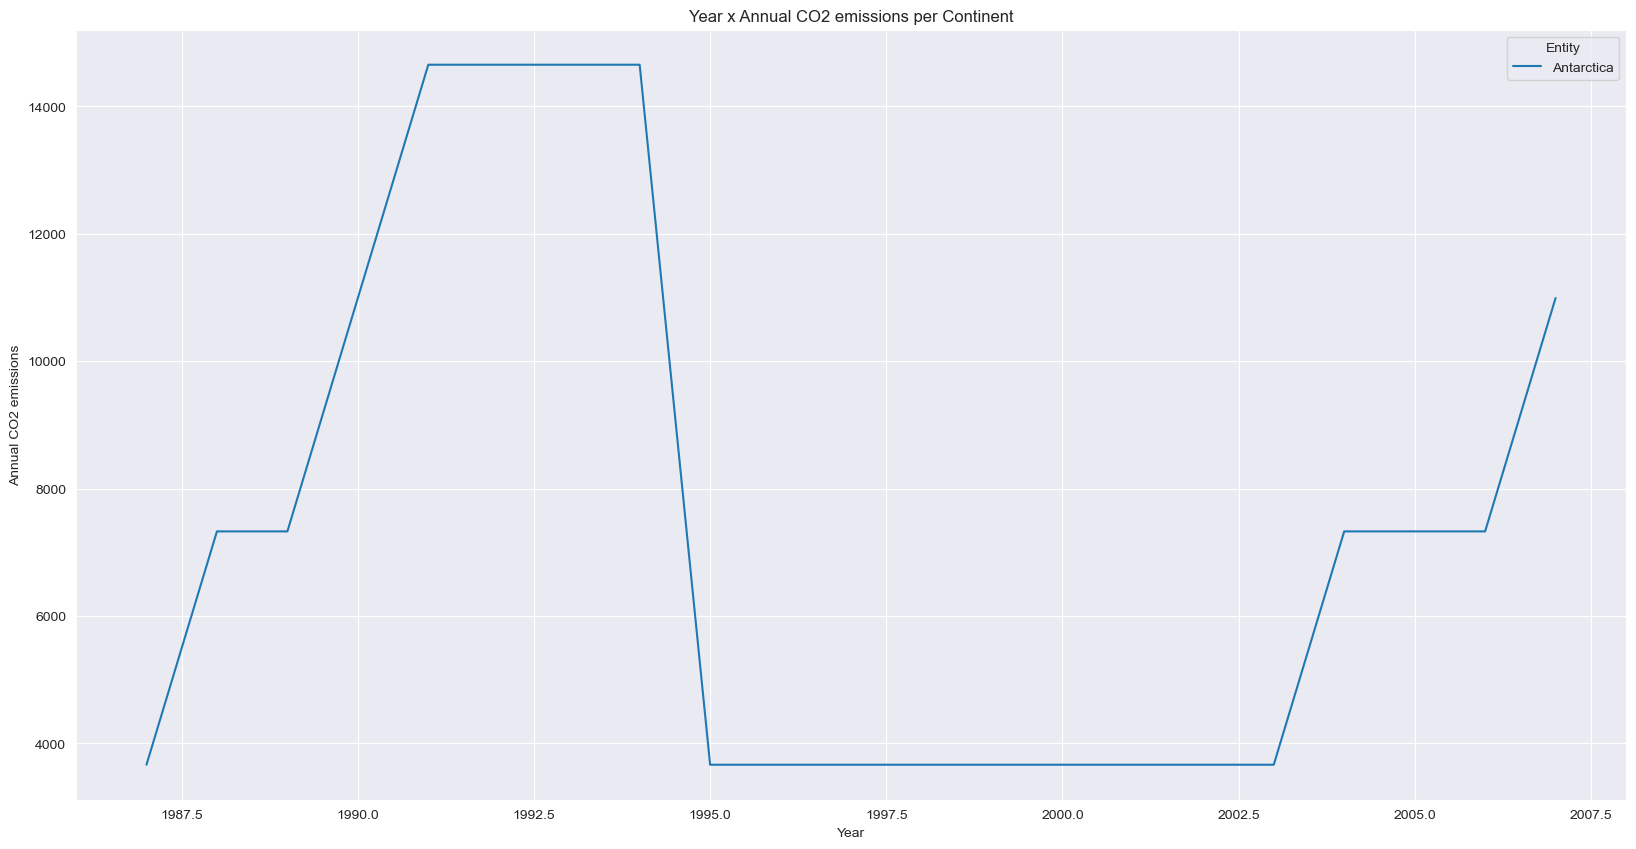

In [54]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Annual change in primary energy consumption (%)']"

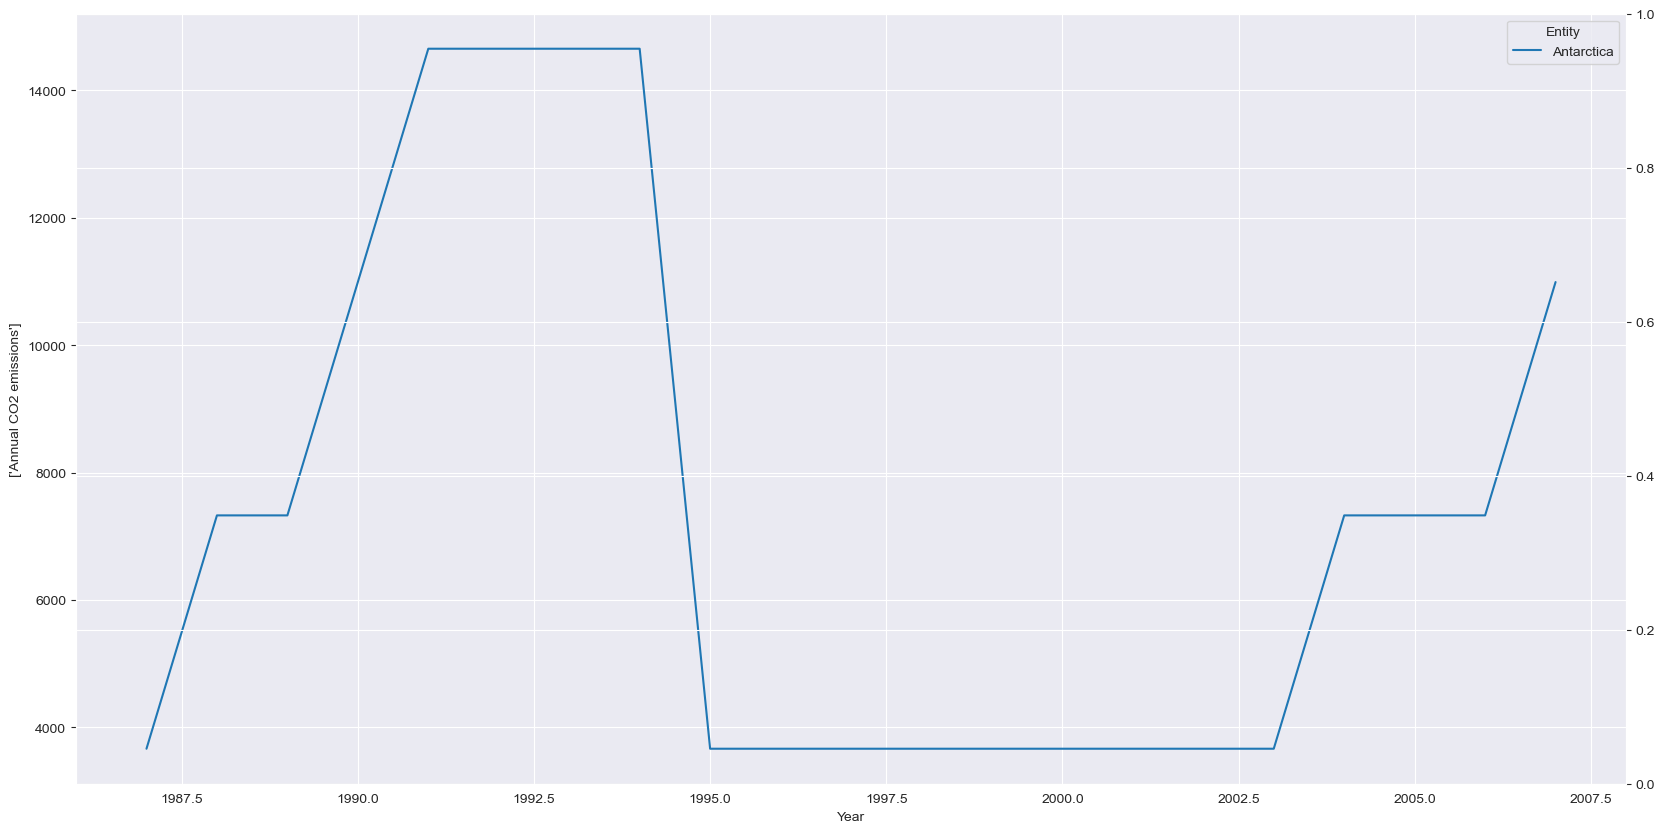

In [55]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

In [56]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Fossil fuels per capita (kWh)']"

In [57]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Fossil fuels per capita (kWh)']"

#### Correlation Heatmap - For Entity Across Metrics

In [58]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

In [59]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")

KeyError: "['Annual change in primary energy consumption (%)', 'Per capita electricity (kWh)', 'Fossil fuels per capita (kWh)', 'Renewables per capita (kWh - equivalent)'] not in index"

### Specific Countries

In [60]:
category_filter = "Country"

df = df_original.copy().loc[
    (df_original['Entity_Category'] == category_filter)
    & (df_original['Entity'].isin(country_list))
]

In [61]:
df.head()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted,Entity,Entity_Category
483,1961,10992.0,5.912565e+07,-3.809035e+07,1.108681e+07,5.912565e+07,5.912565e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,0.0,0.0,0.0,-1.304030e+07,United Arab Emirates,Country
484,1962,18320.0,6.193741e+07,-3.622570e+07,1.329877e+07,6.193741e+07,6.193741e+07,-7.364461e+07,-7.364461e+07,-7.364461e+07,-7.364461e+07,-7.364461e+07,-7.364461e+07,0.0,0.0,0.0,-1.170720e+07,United Arab Emirates,Country
485,1963,21984.0,6.474916e+07,-3.292965e+07,1.436530e+07,6.474916e+07,6.474916e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,0.0,0.0,0.0,-9.090694e+06,United Arab Emirates,Country
486,1964,18320.0,6.756092e+07,-2.916922e+07,1.892325e+07,6.756092e+07,6.756092e+07,-7.275148e+07,-7.275148e+07,-7.275148e+07,-7.275148e+07,-7.275148e+07,-7.275148e+07,0.0,0.0,0.0,-5.190564e+06,United Arab Emirates,Country
487,1965,21984.0,7.038038e+07,-2.628082e+07,2.075857e+07,7.038038e+07,7.038038e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,-7.216595e+07,0.0,0.0,0.0,-1.785568e+06,United Arab Emirates,Country


In [62]:
df.describe()

,Year,Annual CO2 emissions,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Annual CO2 emissions_predicted
count,272.000000,1.800000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,272.0,272.0,272.0,2.720000e+02
mean,2005.503676,3.606879e+08,3.447155e+08,3.651898e+08,4.505626e+08,3.362119e+08,3.535965e+08,6.312657e+07,6.312657e+07,6.312657e+07,6.312657e+07,6.312657e+07,6.312657e+07,0.0,0.0,0.0,4.078420e+08
std,25.839270,4.845640e+08,3.782707e+08,4.519193e+08,5.352635e+08,3.667385e+08,3.922904e+08,1.344386e+08,1.344386e+08,1.344386e+08,1.344386e+08,1.344386e+08,1.344386e+08,0.0,0.0,0.0,4.931142e+08
min,1961.000000,1.099200e+04,-1.197579e+07,-3.809035e+07,1.958014e+06,-1.197579e+07,-1.197579e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,-7.383986e+07,0.0,0.0,0.0,-1.304030e+07
25%,1983.000000,6.178898e+06,8.683091e+06,1.077507e+07,1.909071e+07,8.382750e+06,8.950073e+06,-6.764605e+07,-6.764605e+07,-6.764605e+07,-6.764605e+07,-6.764605e+07,-6.764605e+07,0.0,0.0,0.0,1.558639e+07
50%,2006.000000,5.542978e+07,1.940781e+08,1.085367e+08,1.568099e+08,1.940781e+08,1.940781e+08,1.303536e+07,1.303536e+07,1.303536e+07,1.303536e+07,1.303536e+07,1.303536e+07,0.0,0.0,0.0,1.331612e+08
75%,2027.250000,8.984534e+08,7.294519e+08,8.785631e+08,1.065292e+09,7.284189e+08,7.294519e+08,2.426646e+08,2.426646e+08,2.426646e+08,2.426646e+08,2.426646e+08,2.426646e+08,0.0,0.0,0.0,9.715347e+08
max,2050.000000,1.315343e+09,1.010172e+09,1.165686e+09,1.366508e+09,1.010172e+09,1.093748e+09,2.616492e+08,2.616492e+08,2.616492e+08,2.616492e+08,2.616492e+08,2.616492e+08,0.0,0.0,0.0,1.252054e+09


#### Lineplots - Yearly

In [63]:
x = 'Year'
c = 'Entity'

y = 'Annual CO2 emissions'

Text(0.5, 1.0, 'Year x Annual CO2 emissions per Country')

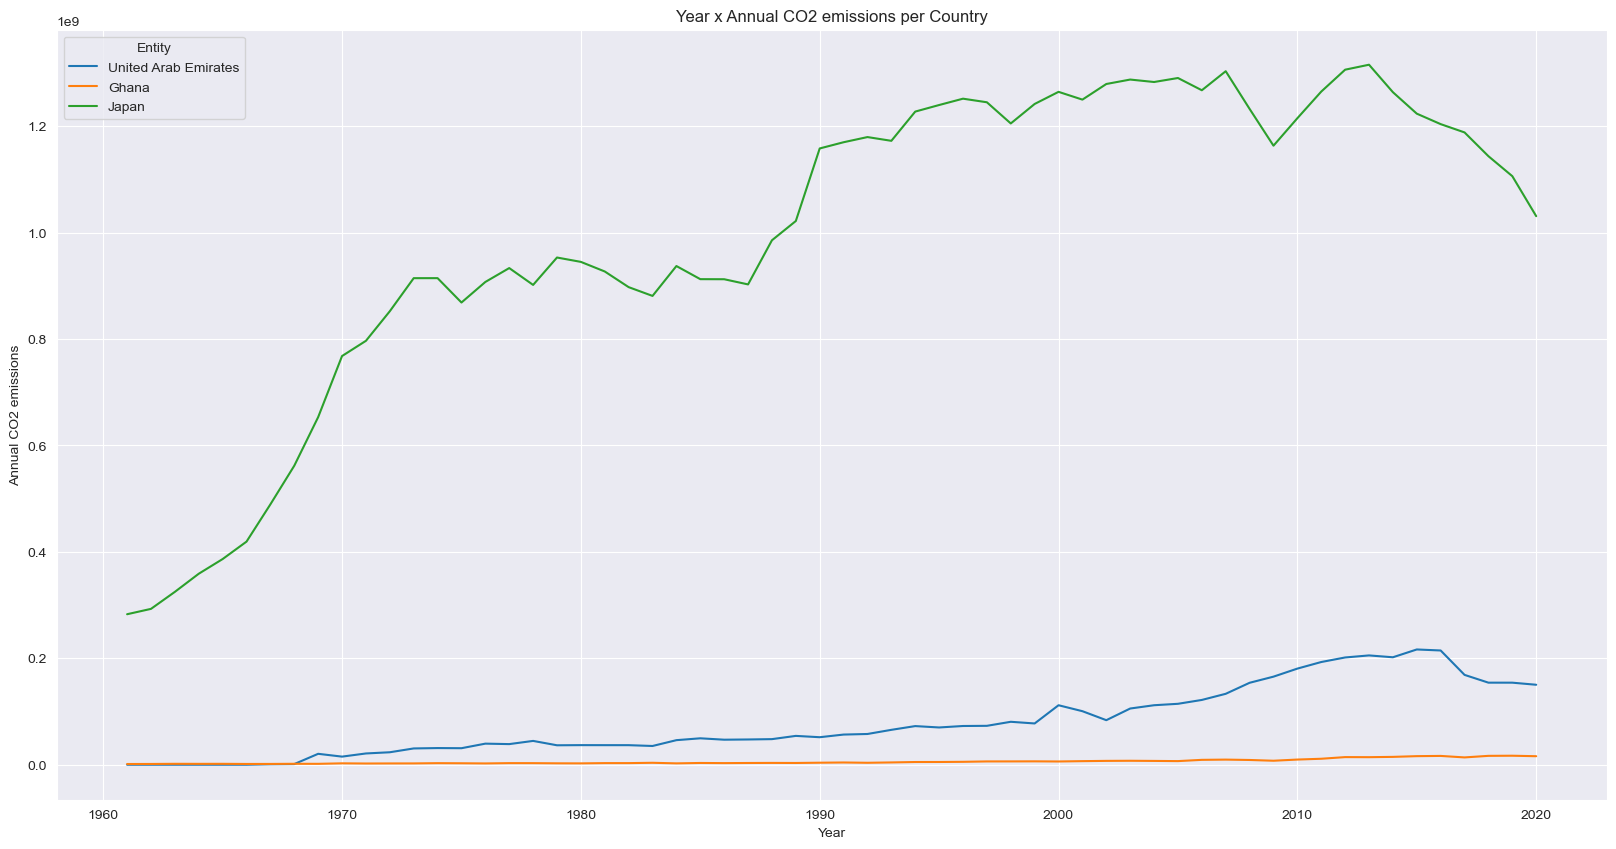

In [64]:
sns.lineplot(data=df, x=x, y=y, hue=c)

plt.title(f"{x} x {y} per {category_filter}")

Text(0.5, 1.0, "Year x ['Annual CO2 emissions', 'Annual CO2 emissions_predicted'] per Country")

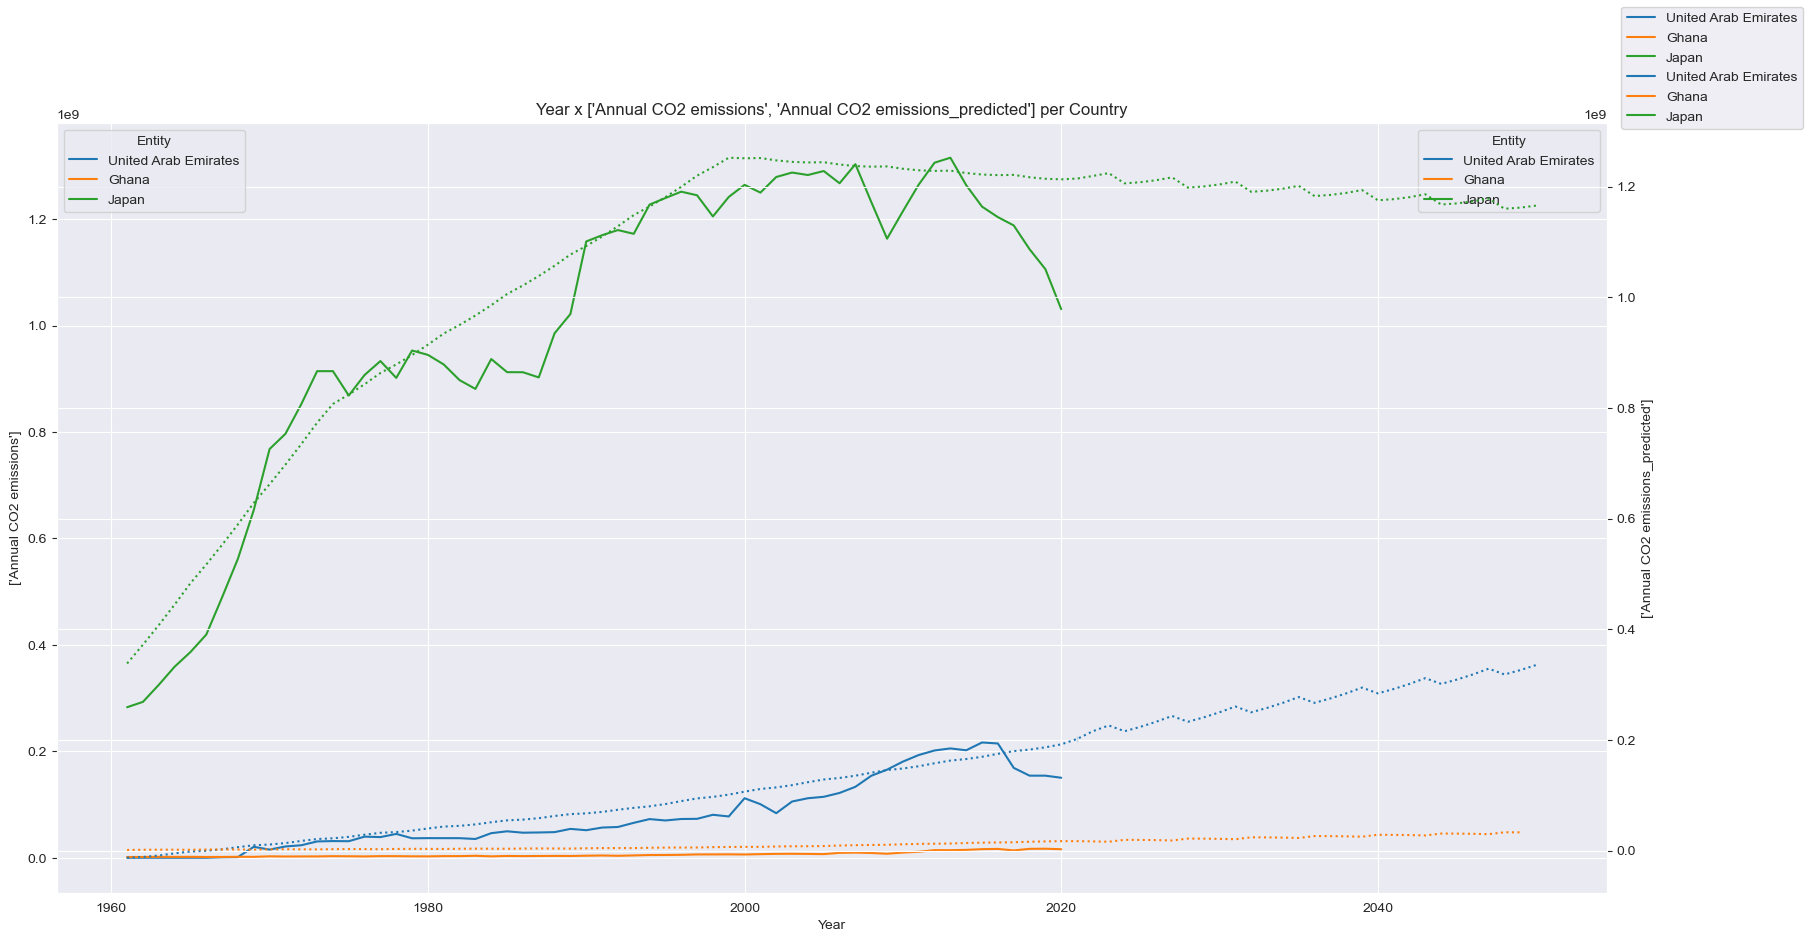

In [66]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual CO2 emissions_predicted']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Annual change in primary energy consumption (%)']"

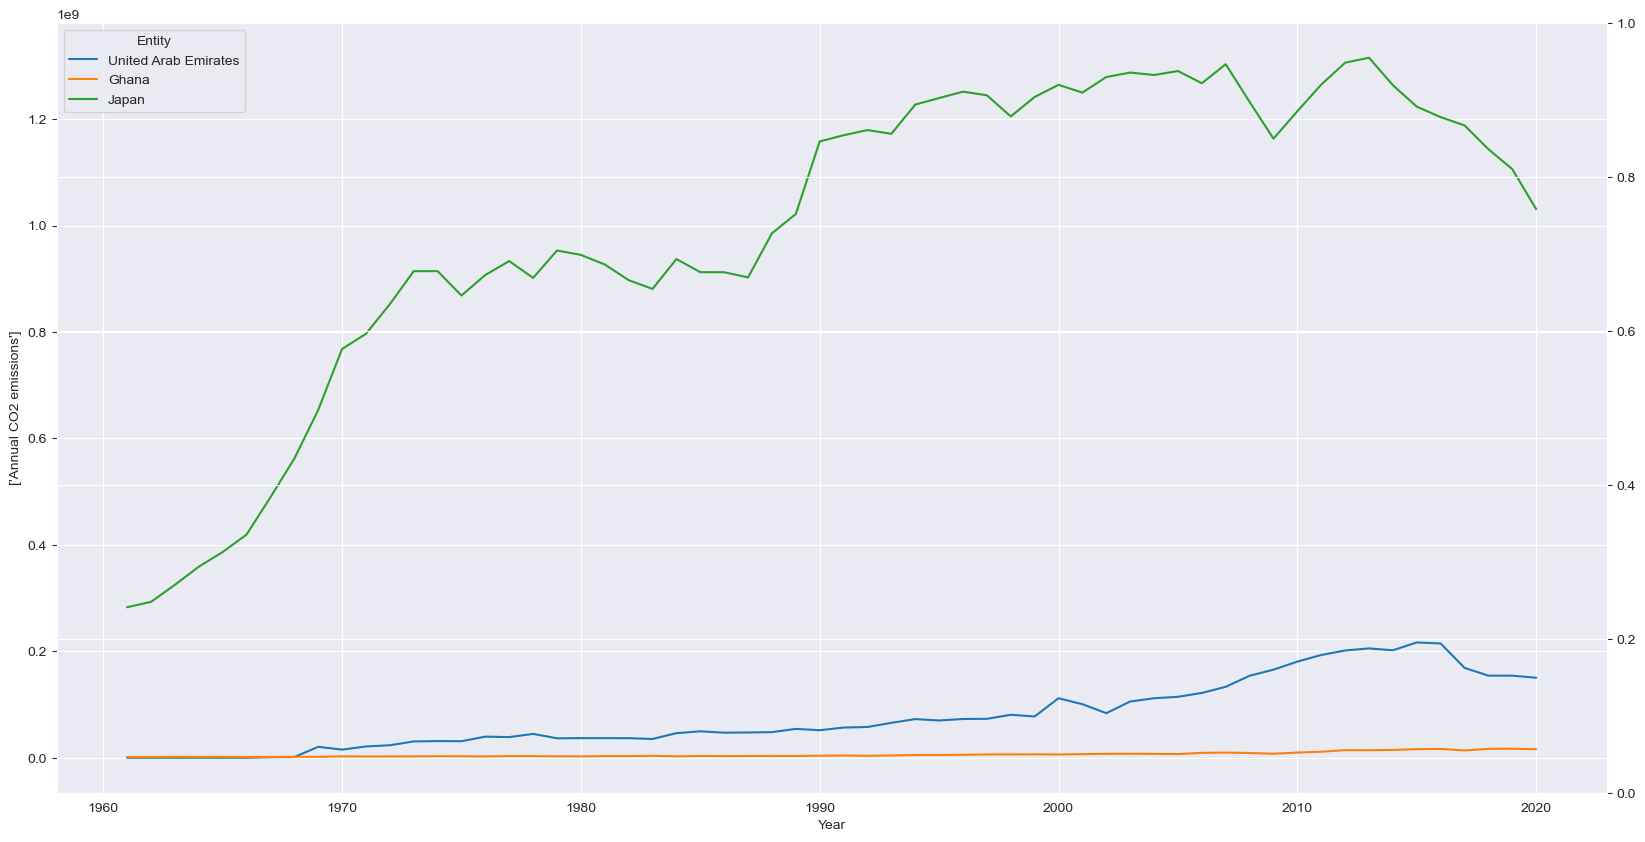

In [65]:
y1 = ['Annual CO2 emissions']
y2 = ['Annual change in primary energy consumption (%)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

In [ ]:
y1 = ['Fossil fuels per capita (kWh)',]
y2 = ['Renewables per capita (kWh - equivalent)']

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

Text(0.5, 1.0, "Year x ['Fossil fuels per capita (kWh)', 'Solar Generation - TWh', 'prod of Electricity from solar (TWh)'] per Country")

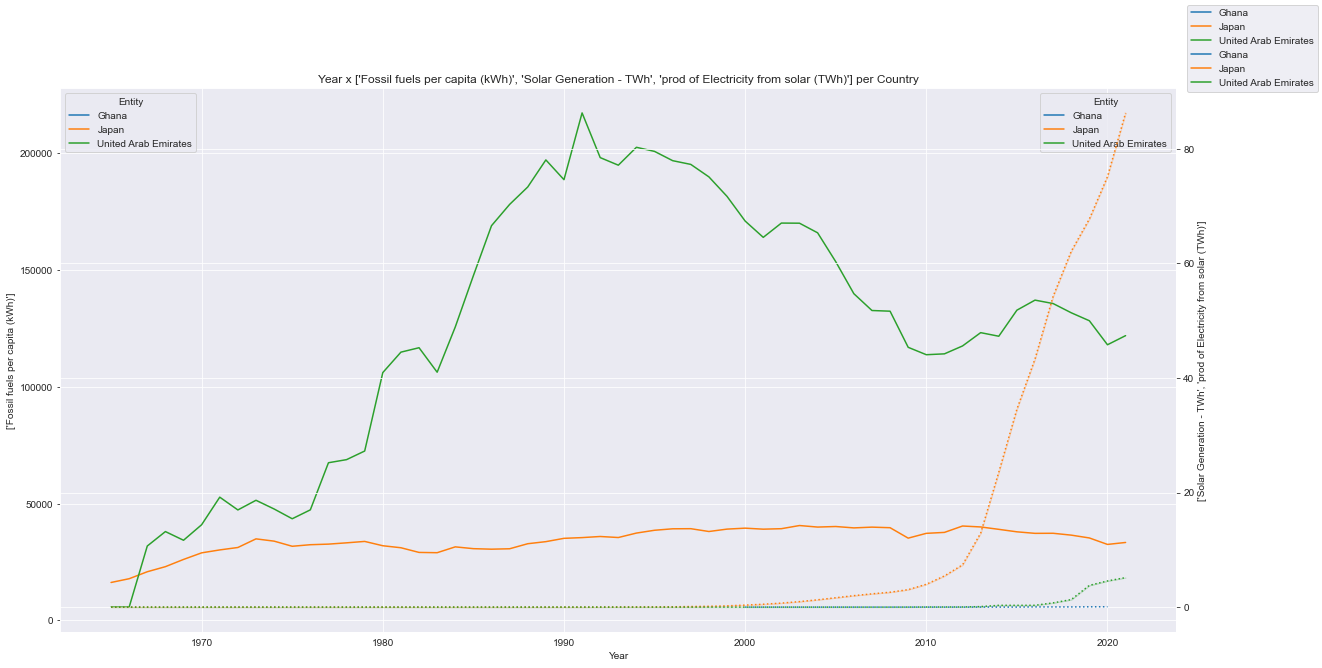

In [50]:
y1 = ['Fossil fuels per capita (kWh)']
y2 = ['Solar Generation - TWh', 'prod of Electricity from solar (TWh)']


df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y1, value_name=str(y1))
ax = sns.lineplot(data=df_viz, x=x, y=str(y1), hue=c, legend='auto')

ax2 = ax.twinx()

df_viz = pd.melt(df, id_vars=['Entity_Category', 'Entity', 'Year'], value_vars=y2, value_name=str(y2))
sns.lineplot(data=df_viz, x=x, y=str(y2), ax=ax2, hue=c, linestyle=':')

ax.figure.legend()
plt.title(f"{x} x {y1 + y2} per {category_filter}")

#### Correlation Heatmap - For Entity Across Metrics

In [51]:
#TODO Multiplot for each Income Level
# corr = df[key_columns].corr()

# sns.heatmap(data=corr)
# plt.title(f"Correlation of Key Metrics across Years in Category [{category_filter}]")

#### Correlation Heatmap - For Key Metrics Across Entities in 2020

Text(0.5, 1.0, 'Correlation of Key Metrics across each Category [Country]')

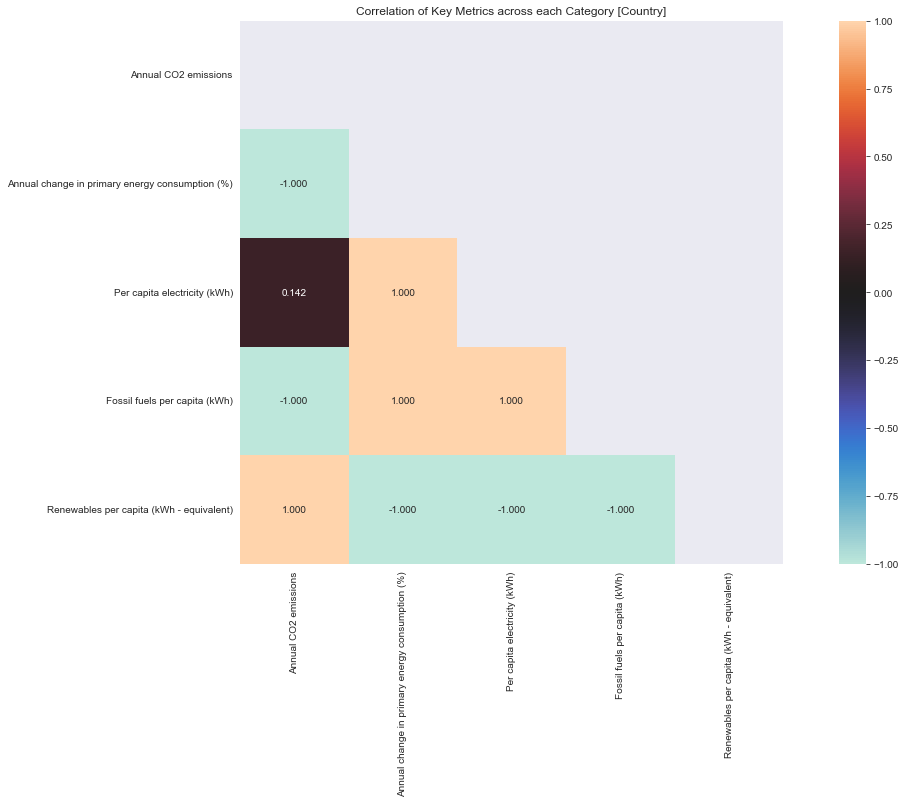

In [52]:
corr = df.loc[df['Year'] == 2020][corr_columns].corr()

masked_heatmap()
plt.title(f"Correlation of Key Metrics across each Category [{category_filter}]")